#Análise de acidentes com animais peçonhentos no Brasil
Resolvi buscar os acidentes com animais peçonhentos, tentando verificar qual é o lugar onde mais há notificações, se há diferença entre as Unidades da Federação em relação ao tipo de acidente. Espero que seja uma análise interessante para todos!

#Importação das bibliotecas utilizadas na Análise
Utilizarei três bibliotecas básicas e poderosas, uma para a análise dos dados e duas para a visualização.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importação dos dados
Baixei os dados no endereço do [Tabnet - DataSUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/animaisbr.def), na área de Doenças e Agravos com Notificação, selecionando dados no Brasil por UF e entre os anos 2007 e 2021 e por **animal**. Depois hospedei-os no meu Github para reprodução de outras pessoas que quiserem verificar a análise.

In [109]:
dados = pd.read_csv('https://raw.githubusercontent.com/decao88/bootcamp-alura/main/A181039189_28_143_208.csv', 
            encoding='latin1', sep=';', skiprows = 3, skipfooter=15, thousands = '.', decimal=',')

dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,UF de notificação,Ign/Branco,Serpente,Aranha,Escorpião,Lagarta,Abelha,Outros,Total
0,11 Rondônia,310,7353,1655,2547,326,970,985,14146
1,12 Acre,294,6464,898,2365,148,831,1102,12102
2,13 Amazonas,632,23361,2350,4568,585,431,2060,33987
3,14 Roraima,137,4887,409,1518,172,1144,811,9078
4,15 Pará,730,69981,4175,24856,391,1321,4003,105457
5,16 Amapá,100,6745,282,2673,60,44,110,10014
6,17 Tocantins,425,11767,1820,12472,1583,3656,8333,40056
7,21 Maranhão,357,22762,1578,11746,671,1221,1183,39518
8,22 Piauí,958,3862,1419,20461,325,3662,1736,32423
9,23 Ceará,733,10322,1797,44517,432,5490,1549,64840


Neste banco, deixei as linhas e colunas de *Total*, para poder fazer comparações por população depois

# Dados de população
Os dados de população foram retirados também do Tabnet - DataSUS, mas da área de informações Demográficas e Socioeconômicas, puxando então os dados de [Estimativa populacional de acordo com o TCU](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?ibge/cnv/poptuf.def). O bom de utilizar o banco do tabnet, é que os dados vem com quase a mesma formatação que os de doenças e agravos.

In [110]:
populacao = pd.read_csv('https://raw.githubusercontent.com/decao88/bootcamp-alura/main/A181754189_28_143_208.csv', encoding='latin1', sep=';', skiprows = 3, skipfooter=11, thousands = '.', decimal=',')
populacao.columns = ['UF de notificação', 'População_estimada'] #trocar o nome da coluna para poder fazer o merge mais para frente

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


#Análise dos dados
O primeiro passo que farei é juntar os dois bancos de dados, e trabalhar com um DataFrame só.

In [111]:
dados_com_populacao = pd.merge(dados,populacao, on='UF de notificação')
dados_com_populacao.head()

,UF de notificação,Ign/Branco,Serpente,Aranha,Escorpião,Lagarta,Abelha,Outros,Total,População_estimada
0,11 Rondônia,310,7353,1655,2547,326,970,985,14146,1777225
1,12 Acre,294,6464,898,2365,148,831,1102,12102,881935
2,13 Amazonas,632,23361,2350,4568,585,431,2060,33987,4144597
3,14 Roraima,137,4887,409,1518,172,1144,811,9078,605761
4,15 Pará,730,69981,4175,24856,391,1321,4003,105457,8602865


O segundo passo para uma análise mais acertiva é analisar os dados por habitante (100.000 habitantes neste caso), pois é mais esperado que haja mais acidentes em um local com mais pessoas.

In [112]:
dados_com_populacao['acidentes_por_100milhab'] = dados_com_populacao['Total']/dados_com_populacao['População_estimada']*100000
dados_com_populacao['acidentes_por_100milhab'] = dados_com_populacao['acidentes_por_100milhab'].round(2)
dados_com_populacao = dados_com_populacao.set_index('UF de notificação')

dados_com_populacao.head()

,Ign/Branco,Serpente,Aranha,Escorpião,Lagarta,Abelha,Outros,Total,População_estimada,acidentes_por_100milhab
UF de notificação,,,,,,,,,,
11 Rondônia,310,7353,1655,2547,326,970,985,14146,1777225,795.96
12 Acre,294,6464,898,2365,148,831,1102,12102,881935,1372.21
13 Amazonas,632,23361,2350,4568,585,431,2060,33987,4144597,820.03
14 Roraima,137,4887,409,1518,172,1144,811,9078,605761,1498.61
15 Pará,730,69981,4175,24856,391,1321,4003,105457,8602865,1225.84


#Visualização dos dados
## Acidentes por 100.000 habitantes
Mais do que uma tabela, o gráfico nos dá uma visão imediata de como estes dados estão distribuídos. Para isso, utilizei o matplotlib para plotar os acidentes por 100.00 habitantes em cada UF e o Total (também conhecido como Brasil).

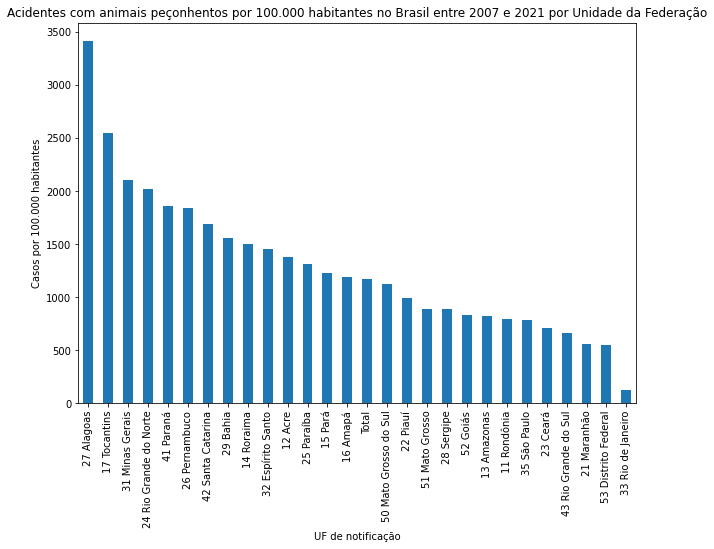

In [113]:
ax = dados_com_populacao['acidentes_por_100milhab'].sort_values(ascending=False).plot(kind='bar', figsize=(10,7))

plt.title('Acidentes com animais peçonhentos por 100.000 habitantes no Brasil entre 2007 e 2021 por Unidade da Federação')
ax.yaxis.set_label_text('Casos por 100.000 habitantes')

plt.show()

Fácil verificar duas coisas:
* O Rio de Janeiro provavelmente possui subnotificação dos dados, pois o número de acidentes é muito baixo em relação a qualquer outro estado. Uma análise mais profunda poderia mostrar por que isto acontece, seja por utilização de outro sistema, ou queda de notificações com o tempo, ou até mesmo se outras doenças também são assim no estado;
* Alagoas é o primeiro lugar isolado, com quase 50% a mais do que o Tocantins (2º lugar). Existem duas possibilidades: ou realmente existem mais acidentes lá, ou a equipe do estado é muito bem capacitada e notifica todos os acidentes.

## Acidentes por tipo de animal envolvido
Outra análise interessante é verificar qual tipo de animal se envolve em mais acidentes por UF. Para isso, retiramos as colunas **Total, População_estimada e acidentes_por_100milhab**. Em seguida, utilizamos a função *div*, a qual retorna um DataFrame normalizado por linha (com os parâmetros setados). E para melhor visualização, utilizamos o *Heatmap* do Seaborn, que é uma espécie de formatação condicional do Excel. 

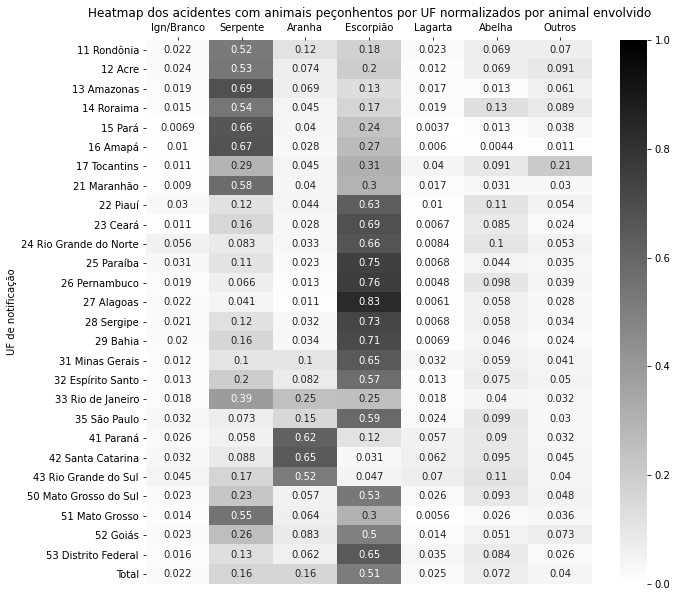

In [114]:
dados_animais = dados_com_populacao.drop(['Total', 'População_estimada','acidentes_por_100milhab'], axis=1)
dados_animais_normalizado = dados_animais.div(dados_animais.sum(axis=1), axis=0)
plt.figure(figsize = (10,10))
ax = sns.heatmap(dados_animais_normalizado, annot=True, cmap='binary', vmax=1, vmin=0)
ax.xaxis.tick_top()


plt.title('Heatmap dos acidentes com animais peçonhentos por UF normalizados por animal envolvido')

plt.show()

Aqui nota-se que acidentes com serpente são muito mais recorrente na região Norte do país, enquanto que com escorpião é nos estados do Nordeste, Sudeste e Centro-Oeste. Na região Sul, acidentes envolvendo aranhas é muito mais prevalente. É possível notar que no tocantis o tipo *Outros* tem quase 21% dos acidentes, o que poderia levar a uma investigação mais a fundo se são sempre os mesmos *outros*, ou é um conjunto de vários animais diferentes. Como média geral, no Brasil os acidentes são mais causados por Escorpião.

#Conclusões
* O Rio de Janeiro provavelmente é subnotificado em relação a acidentes com animais peçonhentos;
* Alagoas possui muitos acidentes, seja por ser mais bem notificado do que outros estados, ou isso demonstra que há muitos acidentes lá, e políticas públicas devem ser implementadas a fim de diminuir estes números;
* Cada região tem um animal predominante nos acidentes, sendo:
  * **Serpente** mais presente nos estados do Norte, mais Maranhão e Mato Grosso;
  * **Escorpião** mais presente no Nordeste e Sudeste;
  * **Aranha** mais presente no Sul;
* Tocantins com porcentagem muito alta de **Outro**, sendo necessário avaliar as fichas individualmente para verificar se são animais recorrentes ou não.
